In [1]:
import quandl
import pandas as pd

quandl.ApiConfig.api_key = ""
stocks = "AADR,BAB,CAF"
td = quandl.get_table('SHARADAR/SFP', qopts={"columns":['ticker','date','close','volume']} ,ticker=stocks)

In [2]:
df = td.pivot(index="date", columns='ticker', values="close")
df = df.dropna()

In [3]:
expert_prior_params = dict(zip(stocks.split(","), zip([x/10 for x in range(1,len(stocks.split(","))+1)] , [x/10 for x in range(1, len(stocks.split(","))+1)])))

In [4]:
expert_prior_params

{'AADR': (0.1, 0.1), 'BAB': (0.2, 0.2), 'CAF': (0.3, 0.3)}

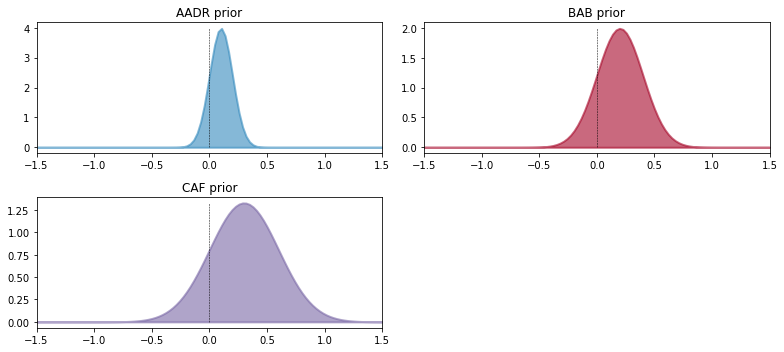

In [5]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt


figsize(11., 5)
colors = ["#348ABD", "#A60628", "#7A68A6", "#467821"]

normal = stats.norm
x = np.linspace(-1.5, 1.5, 100)


for i, (name, params) in enumerate(expert_prior_params.items()):
    plt.subplot(2, 2, i+1)
    y = normal.pdf(x, params[0], scale = params[1])
    #plt.plot( x, y, c = colors[i] )
    plt.fill_between(x, 0, y, color = colors[i], linewidth=2,
                     edgecolor = colors[i], alpha = 0.6)
    plt.title(name + " prior")
    plt.vlines(0, 0, y.max(), "k","--", linewidth = 0.5)
    plt.xlim(-1.5, 1.5)
plt.tight_layout()

In [6]:
prior_mu = np.array([x[0] for x in expert_prior_params.values()])
prior_std = np.array([x[1] for x in expert_prior_params.values()])

In [7]:
stock_closes = df[::-1]
stock_returns = stock_closes.pct_change()[1:]

In [8]:
stock_returns

ticker          AADR       BAB       CAF
date                                    
2018-11-19  0.037209  0.003129  0.022657
2018-11-16  0.019731  0.002080  0.010070
2018-11-15 -0.000220 -0.003113 -0.003988
2018-11-14 -0.009897  0.000347 -0.022523
2018-11-13  0.009396 -0.001387  0.007168
2018-11-12  0.004137 -0.001042 -0.036096
2018-11-09  0.017510 -0.004172  0.016878
2018-11-08  0.017876 -0.003142  0.011411
2018-11-07  0.025815 -0.000350  0.009231
2018-11-06 -0.021885  0.000701 -0.008638
2018-11-05 -0.000401  0.002101 -0.009226
2018-11-02 -0.001899 -0.002795  0.005691
2018-11-01  0.000423  0.007358 -0.003086
2018-10-31 -0.019438 -0.001391 -0.037668
2018-10-30 -0.018660  0.001742 -0.020375
2018-10-29 -0.006894  0.002086 -0.011494
2018-10-26  0.012602  0.000000  0.029900
2018-10-25  0.013100 -0.001041  0.010215
2018-10-24 -0.012069 -0.000695 -0.023949
2018-10-23  0.041012 -0.001043  0.011996
2018-10-22  0.021794 -0.001392  0.015086
2018-10-19  0.002666  0.003171 -0.030786
2018-10-18  0.004704  0.001876 -0.029025
2018-10-17  0.016124  0.000173  0.069374
2018-10-16  0.008375  0.002253  0.016878
2018-10-15 -0.032784 -0.002594 -0.014004
2018-10-12  0.000616  0.002080  0.021568
2018-10-11 -0.017450  0.001038  0.004634
2018-10-10  0.008149 -0.005185  0.030753
2018-10-09  0.041244 -0.001390  0.012929
...              ...       ...       ...
2010-08-31 -0.023314  0.007654 -0.022583
2010-08-30 -0.002170 -0.001482  0.006859
2010-08-27 -0.001186 -0.013358  0.012549
2010-08-26 -0.010293  0.015419 -0.012748
2010-08-25 -0.005200 -0.006667 -0.001076
2010-08-24  0.003619  0.004847  0.000000
2010-08-23  0.014864 -0.008163  0.016158
2010-08-20 -0.001224 -0.000748  0.014488
2010-08-19  0.017787 -0.000749  0.009404
2010-08-18  0.005825 -0.004871  0.016908
2010-08-17 -0.005792 -0.003991 -0.002375
2010-08-16 -0.019806  0.004763 -0.018707
2010-08-13 -0.002773 -0.007901 -0.013518
2010-08-12 -0.005165 -0.002655 -0.015390
2010-08-11  0.005192  0.003802 -0.002926
2010-08-10  0.036154 -0.007576  0.025412
2010-08-09 -0.000920 -0.001908  0.018499
2010-08-06 -0.013279  0.004589 -0.002742
2010-08-05  0.007779 -0.005329  0.018900
2010-08-04 -0.001930 -0.004975  0.002361
2010-08-03 -0.001160  0.001923  0.001346
2010-08-02 -0.008130 -0.004223  0.002016
2010-07-30 -0.020297  0.003855 -0.011402
2010-07-29 -0.003187 -0.003840 -0.004410
2010-07-28  0.007194 -0.000386 -0.001363
2010-07-27  0.003571 -0.001543 -0.017400
2010-07-26  0.003163  0.001159  0.017361
2010-07-23 -0.003547 -0.000386  0.009898
2010-07-22 -0.000791  0.002316 -0.019263
2010-07-21 -0.022169  0.005391 -0.036527

[2100 rows x 3 columns]

In [9]:
init = stock_returns.cov()

In [10]:
init

ticker      AADR       BAB       CAF
ticker                              
AADR    0.000132 -0.000008  0.000070
BAB    -0.000008  0.000024 -0.000012
CAF     0.000070 -0.000012  0.000391

In [11]:
import pymc3 as pm
import theano.tensor as tt
from theano.tensor.nlinalg import matrix_inverse, diag, matrix_dot
with pm.Model() as model:
    cov_matrix = pm.WishartBartlett("covariance", np.diag(prior_std**2), 10, testval = init)
    mu = pm.Normal("returns", mu=prior_mu, sd=1, shape=3)

C:\Users\james\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Added new variable c to model diagonal of Wishart.
Added new variable z to model off-diagonals of Wishart.


In [ ]:
with model:
    obs = pm.MvNormal("observed returns", mu=mu, cov=cov_matrix, observed=stock_returns)
    step = pm.NUTS()
    trace = pm.sample(5000, step=step)